# What is ANOVA ?

ANOVA (Analysis of Variance) is a statistical method used to compare the means of three or more groups to determine if there are significant differences among them. It tests the hypothesis that the means of different groups are equal, assuming that the variance within each group is similar.

ANOVA works by analyzing two types of variances: 
1. **Between-group variance**: the variance due to the differences between the groups.
2. **Within-group variance**: the variance due to differences within each group.

The ratio of these two variances (called the F-ratio) is calculated, and if the F-ratio is large enough, it suggests that at least one group mean is significantly different from the others.

There are different types of ANOVA, including:
- **One-way ANOVA**: Tests differences among groups based on one factor or independent variable.
- **Two-way ANOVA**: Tests differences among groups based on two factors or independent variables.
- **Repeated measures ANOVA**: Used when the same subjects are measured multiple times under different conditions.

ANOVA is widely used in various fields like biology, psychology, marketing, and any other discipline that involves comparing multiple groups.

<br>

#### Hypotheses in ANOVA

In ANOVA, there are two main hypotheses:

Null Hypothesis (H₀): The means of all groups are equal. This suggests that any observed differences in sample means are due to random variation rather than actual differences in the population means.

\begin{equation}
    H_0 = \mu_1 = \mu_2 = ... = \mu_t
\end{equation}
​
Where 𝜇 represents the population means of the groups.

<br>
Alternative Hypothesis (H₁): At least one group mean is different from the others. This means that not all the group means are equal, indicating a significant difference between at least one pair of groups.

\begin{equation}
    H_1 = At least one group mean is different
\end{equation}

<br>

# One-Way ANOVA

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/Adidas-US-Sales-Analysis/main/Adidas%20US%20Sales%20Dataset.csv')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


<br>

## Retailer analysis

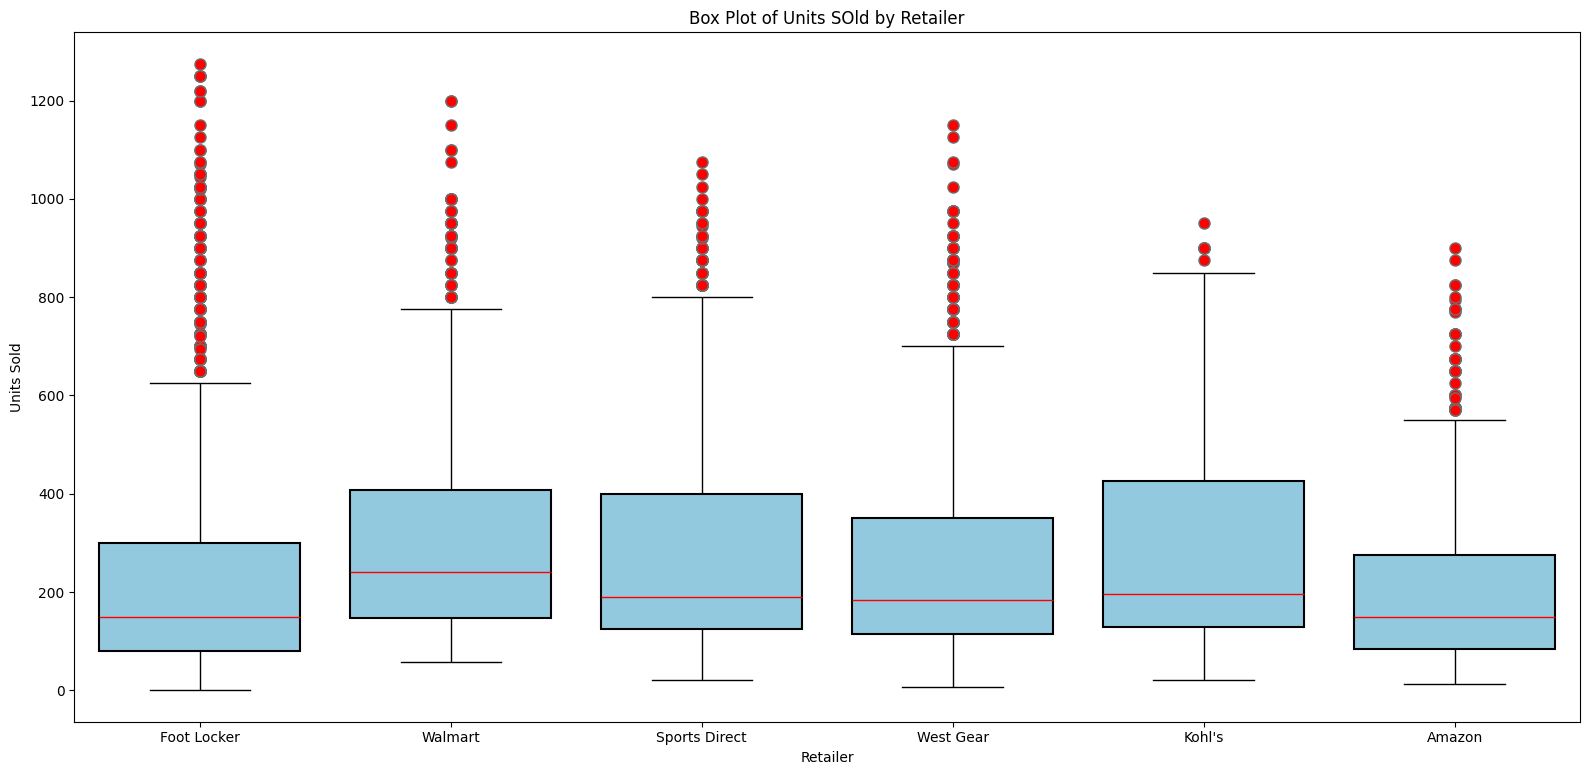

In [6]:
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(x='Retailer', y='Units Sold', data=df, hue='Retailer',
            palette={'Walmart': "skyblue", "Kohl's": "skyblue", "West Gear": "skyblue", "West Gear": "skyblue", 'Amazon': "skyblue", 'Foot Locker': "skyblue", 'Sports Direct': "skyblue"},
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

for patch in boxplot.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)
    
plt.title('Box Plot of Units Sold by Retailer')
plt.suptitle('')
plt.xlabel('Retailer')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

In [22]:
import scipy.stats as stats

retailer_units_sold = df.groupby('Retailer')['Units Sold'].apply(list)

fvalue, pvalue = stats.f_oneway(
    retailer_units_sold['Amazon'], retailer_units_sold['Foot Locker'], retailer_units_sold["Kohl's"],
    retailer_units_sold['Sports Direct'], retailer_units_sold['Walmart'], retailer_units_sold['West Gear']
)

print(f"F-value: {fvalue}, p-value: {pvalue}")

F-value: 38.902853489752744, p-value: 1.082060361454325e-39


<br>

In [57]:
df = df.rename(columns={'Units Sold': 'Units_Sold'})
df = df.rename(columns={'Sales Method': 'Sales_Method'})

In [41]:
a = ols('Units_Sold ~ Retailer', data=df).fit()
r = sm.stats.anova_lm(a, typ=2)
r

,sum_sq,df,F,PR(>F)
Retailer,8.756941e+06,5.0,38.902853,1.082060e-39
Residual,4.340783e+08,9642.0,NaN,NaN


The p-value from the ANOVA test is below 0.05, which suggests that there is a statistically significant **difference** in the number of Adidas products sold across different retailers. This means that at least one retailer differs significantly in the number of units sold compared to the others. We can reject the null hypothesis, which assumed that all retailers sold Adidas products in similar quantities, and conclude that retailer-specific factors may influence Adidas product sales.

<br>

### Tukey's HSD Test Explanation

After identifying a significant difference with ANOVA, it is important to know specifically which retailers differ from each other in terms of Adidas product sales. Tukey's Honestly Significant Difference (HSD) test is a post-hoc test used for this purpose. It compares all possible pairs of group means (in this case, the means of Adidas units sold by each retailer) to determine exactly where the differences lie.

How the Tukey Test Works:

1. **Pairwise Comparisons**: Tukey's HSD test calculates the differences between the means of every possible pair of groups.
2. **Confidence Intervals**: For each pair, the test constructs a confidence interval. If the interval does not include zero, this indicates a statistically significant difference between those two groups.
3. **Adjusts for Multiple Comparisons**: Tukey's test adjusts for the fact that multiple comparisons are being made, reducing the likelihood of Type I errors (false positives).

<br>

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Units_Sold'], groups=df['Retailer'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Amazon,Foot Locker,20.558,0.1075,-2.3352,43.4511,False
Amazon,Kohl's,70.3747,0.0,43.1628,97.5866,True
Amazon,Sports Direct,65.799,0.0,42.0211,89.5769,True
Amazon,Walmart,120.8028,0.0,89.6635,151.942,True
Amazon,West Gear,54.749,0.0,31.5227,77.9753,True
Foot Locker,Kohl's,49.8168,0.0,27.5954,72.0381,True
Foot Locker,Sports Direct,45.241,0.0,27.3892,63.0929,True
Foot Locker,Walmart,100.2448,0.0,73.3571,127.1326,True
Foot Locker,West Gear,34.191,0.0,17.0808,51.3012,True
Kohl's,Sports Direct,-4.5757,0.9933,-27.7076,18.5561,False


Based on the results of Tukey's HSD test, we can draw the following conclusions regarding the number of Adidas products sold by different retailers:

1. **Amazon vs. Other Retailers**:
   - **Significant Differences**: Amazon shows a statistically significant difference in sales compared to Kohl's, Sports Direct, Walmart, and West Gear. The p-values for these comparisons are 0.0, indicating that the differences are highly significant.
   - **No Significant Difference**: There is no statistically significant difference in sales between Amazon and Foot Locker (p = 0.1075).

2. **Foot Locker vs. Other Retailers**:
   - **Significant Differences**: Foot Locker significantly differs in sales from Kohl's, Sports Direct, Walmart, and West Gear. The p-values are 0.0 for all comparisons, indicating strong significance.

3. **Kohl's vs. Other Retailers**:
   - **Significant Differences**: Kohl's significantly differs from Walmart in terms of sales, with a p-value of 0.0.
   - **No Significant Difference**: Kohl's does not show significant differences in sales compared to Sports Direct or West Gear.

4. **Sports Direct vs. Other Retailers**:
   - **Significant Differences**: Sports Direct shows a statistically significant difference in sales compared to Walmart (p = 0.0).
   - **No Significant Difference**: No significant difference is observed between Sports Direct and Kohl's or West Gear.

5. **Walmart vs. West Gear**:
   - **Significant Difference**: Walmart and West Gear differ significantly in sales, with a p-value of 0.0, indicating a highly significant difference.

#### Summary:

The test shows that **Amazon, Foot Locker, Walmart, and West Gear** tend to significantly differ from other retailers in their sales performance. **Walmart** consistently has significantly higher sales than other retailers except **Amazon** and **Foot Locker**, while **Kohl's** and **Sports Direct** do not differ much from each other.

<br>

### Test ANOVA assumptions

ANOVA is based on several key assumptions that must be met for the test to produce valid results:

1. **Independence of Observations**: The data points within and between groups should be independent of each other. This means that the measurement from one individual should not influence the measurement from another.

2. **Normality**: The data within each group should be approximately normally distributed. This assumption becomes less critical with large sample sizes due to the Central Limit Theorem, but in small samples, the normality of the data should be checked.

3. **Homogeneity of Variances (Homoscedasticity)**: The variance within each group should be similar. This means that the spread of the data points around the mean is roughly equal for all groups. ANOVA can be sensitive to violations of this assumption, so it’s important to test for equal variances using methods like Levene's test.

If these assumptions are violated, the results of the ANOVA may not be reliable, and alternative statistical methods may be required, such as non-parametric tests or transformations of the data.

<br>

#### Testing for Normality
The Shapiro-Wilk test is used to check if the residuals follow a normal distribution.

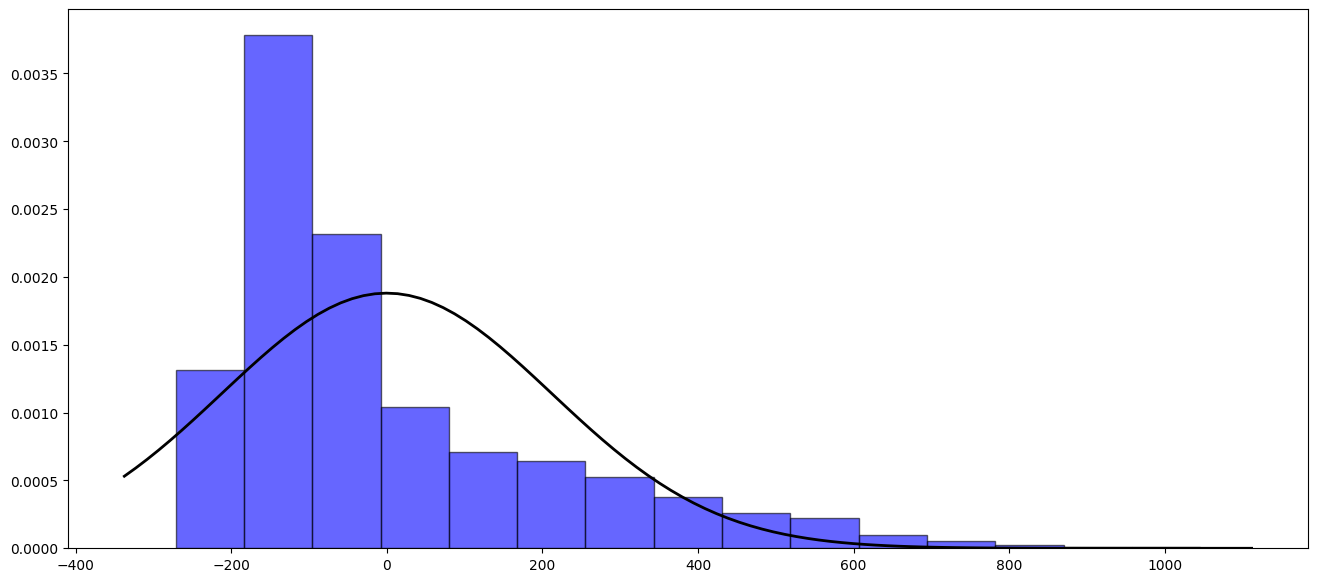

In [47]:
from scipy.stats import norm

plt.figure(figsize=(16,7))
plt.hist(a.resid, bins=15, density=True, alpha=0.6, color='b', edgecolor='black')

mu, std = np.mean(a.resid), np.std(a.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [48]:
from scipy import stats

shapiro_test_statistic, shapiro_p_value = stats.shapiro(a.resid)
print(f'Test statistic: {shapiro_test_statistic}')
print(f'P-Value: {shapiro_p_value}')

Test statistic: 0.8415008783340454
P-Value: 0.0


c:\Users\GRZEGORZ\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Shapiro-Wilk test returned a p-value below 0.05, indicating that the residuals **do not follow a normal distribution**. This suggests that the normality assumption of ANOVA has been violated. When the normality assumption is not met, the results of the ANOVA might be less reliable, especially with smaller sample sizes.

<br>

#### Testing for Homogeneity of Variances
Levene’s test checks for the equality of variances across groups.

In [49]:
from scipy.stats import levene

levene_test = levene(df[df['Retailer'] == 'Amazon']['Units_Sold'],
                     df[df['Retailer'] == 'Foot Locker']['Units_Sold'],
                     df[df['Retailer'] == "Kohl's"]['Units_Sold'],
                     df[df['Retailer'] == 'Sports Direct']['Units_Sold'],
                     df[df['Retailer'] == 'Walmart']['Units_Sold'],
                     df[df['Retailer'] == 'West Gear']['Units_Sold'])

print("Levene's Test: W-statistic = {}, p-value = {}".format(levene_test.statistic, levene_test.pvalue))


Levene's Test: W-statistic = 9.95723022114578, p-value = 1.6220994065643575e-09


Levene’s test returned a p-value below 0.05, indicating that the variances between the groups are **not equal** (heteroscedasticity). This violation of the homogeneity of variances assumption can also affect the validity of the ANOVA results.

<br>

#### Testing for Independence
The Durbin-Watson test is used to detect the presence of autocorrelation in the residuals from a regression analysis.

In [51]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(a.resid)
print("Durbin-Watson Test Statistic:", dw_test)

Durbin-Watson Test Statistic: 0.21944938649783216


The Durbin-Watson statistic of 0.22 indicates strong positive autocorrelation in the residuals, violating the independence assumption of ANOVA. This suggests that the observations are not independent, which further compromises the reliability of the ANOVA results.
<br>

<br>

## Kruskal-Wallis Test

The **Kruskal-Wallis test** is a **non-parametric statistical test** that is used to determine whether there are significant differences between the medians of **two or more independent groups**. It is an alternative to the one-way ANOVA when the assumptions of ANOVA, such as normality and homogeneity of variances, are not met.

### Key Characteristics:
- **Non-parametric**: Unlike ANOVA, the Kruskal-Wallis test does not assume that the data are normally distributed or that the variances are equal across groups.
- **Rank-Based**: The test compares the distributions of the groups by ranking the data points across all groups combined, and then evaluating whether the ranks differ significantly across the groups.
- **Multiple Groups**: The Kruskal-Wallis test can handle two or more groups, making it more general than the Mann-Whitney U test (which compares two groups).

#### Hypotheses:
- **Null Hypothesis (H₀)**: The populations from which the groups are drawn have the same median.
- **Alternative Hypothesis (H₁)**: At least one group's population median is different from the others.

#### Procedure:
1. Rank all the data from all groups combined, ignoring the group to which each observation belongs.
2. Calculate the sum of ranks for each group.
3. The Kruskal-Wallis statistic (H) is calculated based on the differences between the group rank sums and the average rank sum.
4. The statistic H is then compared to a chi-square distribution to determine the p-value.

#### When to Use:
- When the **assumptions of ANOVA** (normality, homogeneity of variances) are violated.
- When working with **ordinal data** or non-normal distributions.
- When the sample sizes are small and/or unequal between groups.

### Limitations:
- The test does not tell you **which groups are different** from each other. If the test is significant (p < 0.05), post-hoc pairwise comparisons (such as Dunn's test or pairwise Mann-Whitney U tests) are needed to identify where the differences lie.
- It assumes that the observations are independent and that the dependent variable is ordinal or continuous.

<br>

In [61]:
from scipy.stats import kruskal

amazon_units = df[df['Retailer'] == 'Amazon']['Units_Sold']
footlocker_units = df[df['Retailer'] == 'Foot Locker']['Units_Sold']
kohls_units = df[df['Retailer'] == "Kohl's"]['Units_Sold']
sportsdirect_units = df[df['Retailer'] == 'Sports Direct']['Units_Sold']
walmart_units = df[df['Retailer'] == 'Walmart']['Units_Sold']
westgear_units = df[df['Retailer'] == 'West Gear']['Units_Sold']

kruskal_test = kruskal(amazon_units, footlocker_units, kohls_units, sportsdirect_units, walmart_units, westgear_units)

print("Kruskal-Wallis Test: H-statistic = {}, p-value = {}".format(kruskal_test.statistic, kruskal_test.pvalue))

Kruskal-Wallis Test: H-statistic = 292.0075652319383, p-value = 5.23271350387593e-61


Since the p-value is less than 0.05, we **reject the null hypothesis**. This indicates that there are statistically significant differences in the median number of products sold across the different retailers.
In other words, the Kruskal-Wallis test provides evidence that at least one retailer differs significantly from the others in terms of median product sales. However, the test does not specify which retailers are different from each other.

<br>

## Sales Method Analysis

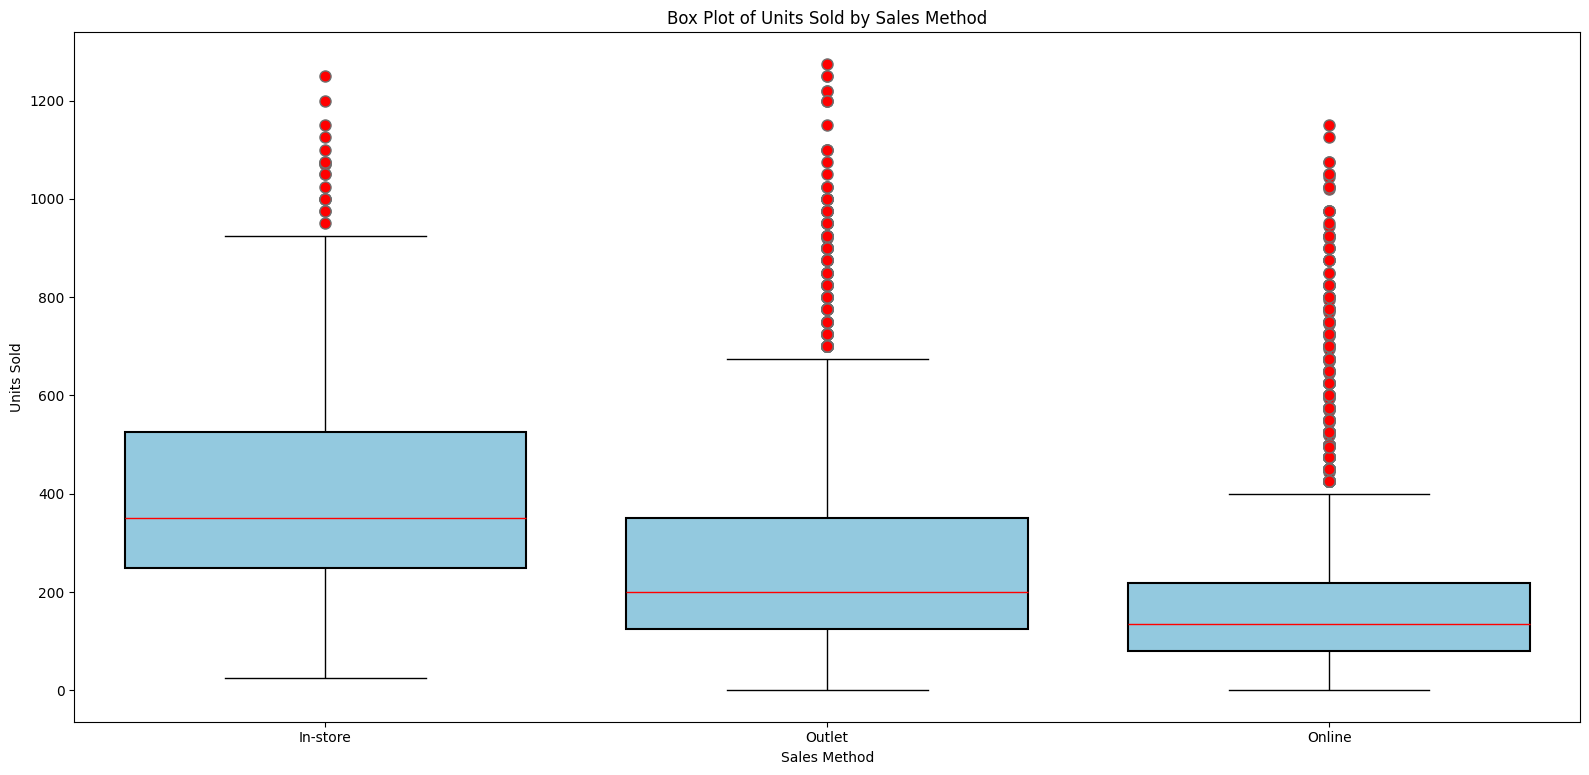

In [58]:
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(x='Sales_Method', y='Units_Sold', data=df, hue='Sales_Method',
            palette={'In-store': "skyblue", "Online": "skyblue", 'Outlet': "skyblue"},
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

for patch in boxplot.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)
    
plt.title('Box Plot of Units Sold by Sales Method')
plt.suptitle('')
plt.xlabel('Sales Method')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

In [59]:
a = ols('Units_Sold ~ Sales_Method', data=df).fit()
r = sm.stats.anova_lm(a, typ=2)
r

,sum_sq,df,F,PR(>F)
Sales_Method,5.629522e+07,2.0,702.34309,1.747469e-285
Residual,3.865400e+08,9645.0,NaN,NaN
